In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys
sys.path.insert(0, "..")

from bandit.bernoulli import BernoulliBandit
from policy.explore_then_commit import ExploreThenCommit, get_optimal_exploration_len_two_arms
from policy.follow_the_leader import FollowTheLeader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
regrets = {"optimal": defaultdict(list), "5": defaultdict(list), "25": defaultdict(list), "125": defaultdict(list)}
n = 5000
cr_1 = 0.5
gaps = np.clip(np.arange(0, cr_1 + 0.01, 0.025), 0, cr_1)
policies = [FollowTheLeader]

for _ in range(250):
    for gap in gaps: 
        cr_2 = cr_1 - gap

        bandit = BernoulliBandit(means=[cr_1, cr_1 - gap])                    
        ExploreThenCommit(bandit, m=int(get_optimal_exploration_len_two_arms(n, gap)), n=n)
        regrets["optimal"][gap].append(bandit.regret())
        
        bandit = BernoulliBandit(means=[cr_1, cr_1 - gap])                    
        ExploreThenCommit(bandit, m=5, n=n)
        regrets["5"][gap].append(bandit.regret())
        
        bandit = BernoulliBandit(means=[cr_1, cr_1 - gap])                    
        ExploreThenCommit(bandit, m=25, n=n)
        regrets["25"][gap].append(bandit.regret())
        
        bandit = BernoulliBandit(means=[cr_1, cr_1 - gap])                    
        ExploreThenCommit(bandit, m=125, n=n)
        regrets["125"][gap].append(bandit.regret())

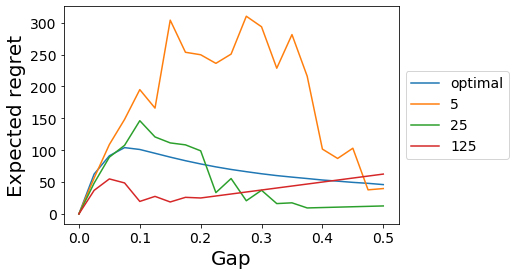

In [83]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
for m, regrets_m in regrets.items():
    ax = pd.DataFrame(regrets_m).mean().plot(ax=ax, label=m)
ax.set_xlabel("Gap")
ax.set_ylabel("Expected regret")
ax.legend(title="m")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))